Empleando los datos del archivo './src/crypto_currency'.

- Cargue los datos en una base de datos apropiada.
- Lea mediante pandas las bases cargadas
- Emplee un metodo de concatenación para unificar la información.(debe considerar que se añadirá una columna adicional que especifique el tipo de moneda)
- Genere un agrupamiento de información a manera de obtener un resumen de los datos.
- Almacene dichos datos en un reporte excel.
- Apoyandose del ejercicio 2. Cree una imagen que sea guarda en el archivo excel
- Emplee un método de envio de correos



In [2]:
pip install pandas openpyxl matplotlib



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


BTC Data:
        Date          Open          High           Low         Close  \
0 2022-10-19  19335.027344  19348.416016  19127.687500  19139.535156   
1 2022-10-20  19138.085938  19315.199219  18971.458984  19053.740234   
2 2022-10-21  19053.203125  19237.384766  18770.970703  19172.468750   
3 2022-10-22  19172.380859  19248.068359  19132.244141  19208.189453   
4 2022-10-23  19207.734375  19646.652344  19124.197266  19567.007813   

      Adj Close       Volume  
0  19139.535156  22425387184  
1  19053.740234  24493974420  
2  19172.468750  32459287866  
3  19208.189453  16104440957  
4  19567.007813  22128794335  

DOGE Data:
        Date      Open      High       Low     Close  Adj Close     Volume
0 2022-10-19  0.059779  0.060680  0.058628  0.058713   0.058713  287297160
1 2022-10-20  0.058711  0.060237  0.058449  0.059536   0.059536  241388629
2 2022-10-21  0.059526  0.059526  0.057418  0.059334   0.059334  224787600
3 2022-10-22  0.059337  0.059846  0.059184  0.059694   0.05

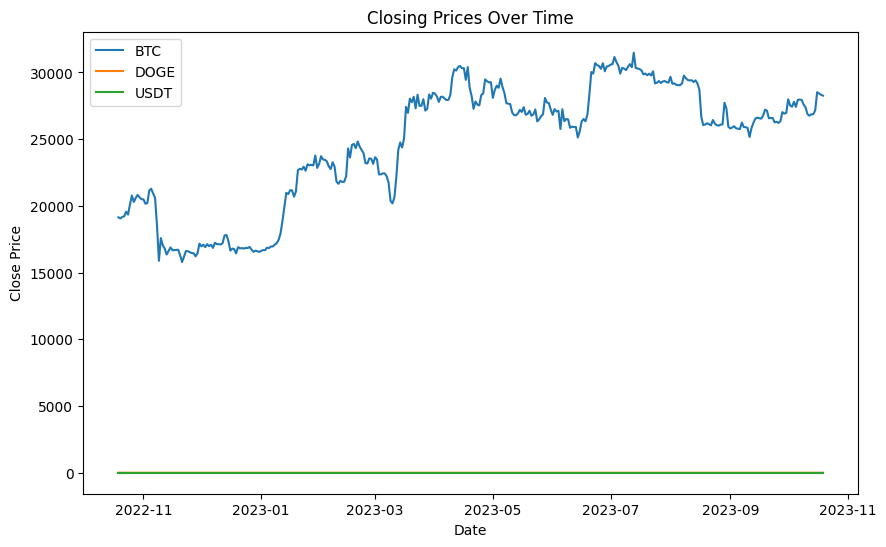

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.image import MIMEImage
import smtplib

# Cargar datos en una base de datos apropiada
btc_data = pd.read_excel('src/cripto_currency.xlsx', sheet_name='BTC-USD')
doge_data = pd.read_excel('src/cripto_currency.xlsx', sheet_name='DOGE-USD')
usdt_data = pd.read_excel('src/cripto_currency.xlsx', sheet_name='USDT-USD')

# Leer las bases cargadas
print("BTC Data:")
print(btc_data.head())

print("\nDOGE Data:")
print(doge_data.head())

print("\nUSDT Data:")
print(usdt_data.head())

# Concatenar los datos y añadir una columna adicional que especifique el tipo de moneda
btc_data['Currency'] = 'BTC'
doge_data['Currency'] = 'DOGE'
usdt_data['Currency'] = 'USDT'

merged_data = pd.concat([btc_data, doge_data, usdt_data])

# Generar un agrupamiento de información
summary_data = merged_data.groupby(['Currency']).agg({
    'Open': 'mean',
    'High': 'max',
    'Low': 'min',
    'Close': 'mean',
    'Adj Close': 'mean',
    'Volume': 'sum'
}).reset_index()

# Almacenar los datos en un reporte Excel
with pd.ExcelWriter('./src/crypto_report.xlsx', engine='openpyxl') as writer:
    summary_data.to_excel(writer, sheet_name='Summary', index=False)
    merged_data.to_excel(writer, sheet_name='Merged_Data', index=False)

# Crear una imagen y guardarla en el archivo Excel
plt.figure(figsize=(10, 6))
for currency, group in merged_data.groupby('Currency'):
    plt.plot(group['Date'], group['Close'], label=currency)

plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.savefig('./src/crypto_chart.png')


In [5]:
# Añadir la imagen al archivo Excel
import openpyxl
book = openpyxl.load_workbook('./src/crypto_report.xlsx')
sheet = book['Merged_Data']
img = openpyxl.drawing.image.Image('./src/crypto_chart.png')
img.anchor = 'E2'
sheet.add_image(img)
book.save('./src/crypto_report.xlsx')

In [8]:

from email.mime.application import MIMEApplication
# Enviar un correo electrónico con el archivo adjunto
from_email = 'tu_correo@gmail.com'
to_email = 'destinatario@gmail.com'
subject = 'Informe de Criptomonedas'
body = 'Adjunto encontrarás el informe de criptomonedas.'

msg = MIMEMultipart()
msg['From'] = from_email
msg['To'] = to_email
msg['Subject'] = subject
msg.attach(MIMEText(body, 'plain'))

# Adjuntar el archivo Excel y la imagen al correo electrónico
with open('./src/crypto_report.xlsx', 'rb') as excel_file:
    attachment = MIMEApplication(excel_file.read(), _subtype="xlsx")
    attachment.add_header('Content-Disposition', 'attachment', filename='crypto_report.xlsx')
    msg.attach(attachment)

with open('./src/crypto_chart.png', 'rb') as img_file:
    img_attachment = MIMEImage(img_file.read(), _subtype="png")
    img_attachment.add_header('Content-Disposition', 'attachment', filename='crypto_chart.png')
    msg.attach(img_attachment)

# Enviar el correo electrónico
smtp_server = 'smtp.gmail.com'
smtp_port = 587
smtp_username = 'tu_correo@gmail.com'
smtp_password = 'tu_contraseña'

with smtplib.SMTP(smtp_server, smtp_port) as server:
    server.starttls()
    server.login(smtp_username, smtp_password)
    server.sendmail(from_email, to_email, msg.as_string())

gaierror: [Errno -2] Name or service not known